In [1]:
import sys


sys.path.append('..')
from src.models.lstm_model import LSTMPredictionModel

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import logging
from src.data import load_data
from src import config
from src.preprocessing.dataset import generate_dataset

In [4]:
logging.basicConfig(level=logging.INFO)
model = LSTMPredictionModel(
    epochs=50,
    batch_size=1024,
)

INFO:LSTMPredictionModel:Init...


In [5]:
PERIOD = 96

shift_value = 1 * PERIOD
year = 2019
loc_x = 200
loc_y = 200

max_values = 40 * PERIOD
x_train, y_train = generate_dataset(
    load_data(data_path=config.DATA_FOLDER, year=year)[:max_values, loc_x, loc_y], shift=shift_value
)
x_val, y_val = generate_dataset(
    load_data(data_path=config.DATA_FOLDER, year=year-1)[:max_values, loc_x, loc_y], shift=shift_value
)
x_test, y_test = generate_dataset(
    load_data(data_path=config.DATA_FOLDER, year=year-2)[:max_values, loc_x, loc_y], shift=shift_value
)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

INFO:root:Computing the difference...
INFO:root:Computing the difference...
INFO:root:Computing the difference...


(3743, 96) (3743,)
(3743, 96) (3743,)
(3743, 96) (3743,)


INFO:LSTMPredictionModel:Fitting the model...


Epoch 1/50
4/4 - 5s - loss: 9.8775e-04 - val_loss: 7.8674e-04 - 5s/epoch - 1s/step
Epoch 2/50
4/4 - 2s - loss: 9.4714e-04 - val_loss: 7.2135e-04 - 2s/epoch - 569ms/step
Epoch 3/50
4/4 - 2s - loss: 9.1006e-04 - val_loss: 6.8633e-04 - 2s/epoch - 515ms/step
Epoch 4/50
4/4 - 2s - loss: 8.8338e-04 - val_loss: 6.5599e-04 - 2s/epoch - 535ms/step
Epoch 5/50
4/4 - 2s - loss: 8.5723e-04 - val_loss: 6.2092e-04 - 2s/epoch - 472ms/step
Epoch 6/50
4/4 - 2s - loss: 8.2337e-04 - val_loss: 5.9275e-04 - 2s/epoch - 478ms/step
Epoch 7/50
4/4 - 2s - loss: 7.9930e-04 - val_loss: 5.6887e-04 - 2s/epoch - 493ms/step
Epoch 8/50
4/4 - 2s - loss: 7.8816e-04 - val_loss: 5.6258e-04 - 2s/epoch - 520ms/step
Epoch 9/50
4/4 - 2s - loss: 7.8714e-04 - val_loss: 5.6343e-04 - 2s/epoch - 507ms/step
Epoch 10/50
4/4 - 2s - loss: 7.8636e-04 - val_loss: 5.6039e-04 - 2s/epoch - 514ms/step
Epoch 11/50
4/4 - 2s - loss: 7.8543e-04 - val_loss: 5.4923e-04 - 2s/epoch - 534ms/step
Epoch 12/50
4/4 - 3s - loss: 7.7756e-04 - val_loss: 5.4

INFO:LSTMPredictionModel:Model fitted.


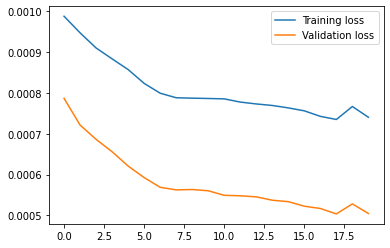

INFO:LSTMPredictionModel:Model fit.


In [8]:
model.fit(
    X_train=x_train,
    y_train=y_train,
    X_val=x_val,
    y_val=y_val,
    plot_history=True
)

In [9]:
# Check if we can predict
x = x_test[0]
print(x.shape)

(96,)


In [10]:
x_test[0].shape
x_final = model.predict(x_test[0], how_many=PERIOD*3, verbose=True)

100%|██████████| 288/288 [00:11<00:00, 25.21it/s]


In [11]:
x_final.shape

(384,)

<Figure size 432x288 with 0 Axes>

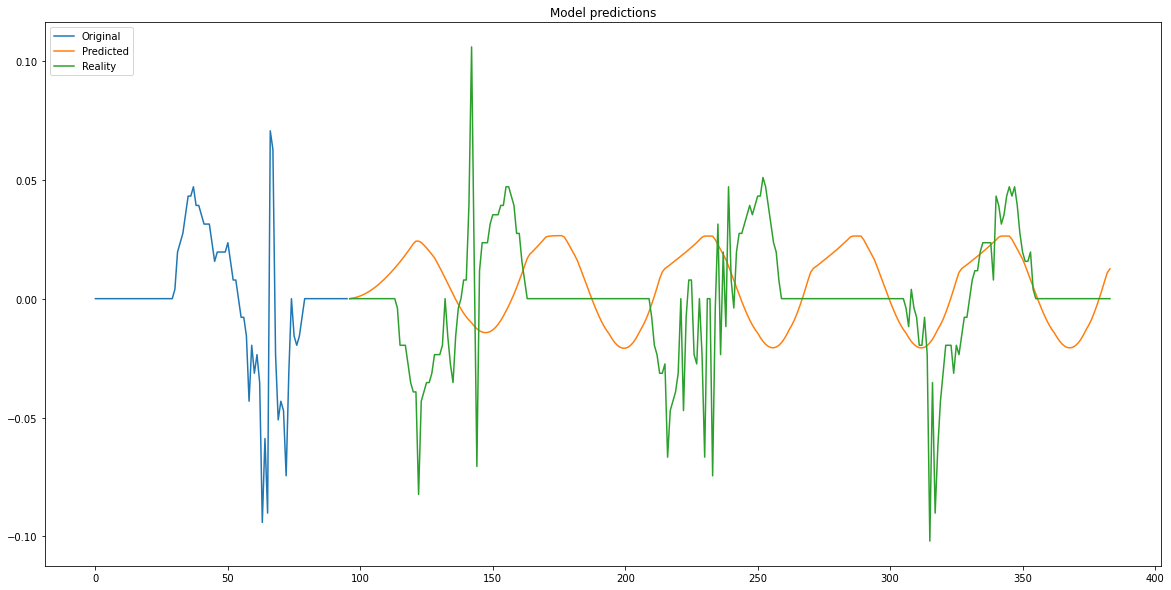

In [55]:
import matplotlib.pyplot as plt

first_values = list(range(0, len(x_test[0])))
pred_values = list(range(len(x_test[0]), len(x_final))) # TODO : ne pas afficher les 96 premières valeurs qui sont overfit

plt.clf()
plt.figure(figsize=(20,10))
plt.plot(first_values, x_test[0], label="Original")
plt.plot(pred_values, x_final[len(x_test[0]):], label="Predicted")
plt.plot(pred_values, y_test[len(x_test[0]): x_final.shape[0]], label="Reality")
plt.legend(loc="upper left")
plt.title("Model predictions")
plt.show();


[-1.94460154e-05  1.83331780e-04  4.29166481e-04  7.50935636e-04
  1.15085579e-03  1.62975211e-03  2.18724832e-03  2.82204617e-03
  3.53211444e-03  4.31490317e-03  5.16752340e-03  6.08690269e-03
  7.06995651e-03  8.11367668e-03  9.21527669e-03  1.03722448e-02
  1.15824519e-02  1.28441695e-02  1.41561134e-02  1.55174891e-02
  1.69279780e-02  1.83877647e-02  1.98974982e-02  2.14582905e-02
  2.30717137e-02  2.41855476e-02  2.41812021e-02  2.36494094e-02
  2.25547794e-02  2.13474054e-02  2.00182125e-02  1.85952112e-02
  1.71951354e-02  1.52003858e-02  1.30969733e-02  1.09059373e-02
  8.65312759e-03  6.36752695e-03  4.08264156e-03  1.83182769e-03
 -3.48081812e-04 -2.42185220e-03 -4.35461849e-03 -6.11268729e-03
 -7.66532868e-03 -8.98582488e-03 -1.01352911e-02 -1.15378127e-02
 -1.26628801e-02 -1.35032758e-02 -1.40500441e-02 -1.42939351e-02
 -1.42286085e-02 -1.38491765e-02 -1.31534375e-02 -1.21442266e-02
 -1.08278431e-02 -9.21422988e-03 -7.31905736e-03 -5.16326725e-03
 -3.04698199e-03 -6.34027

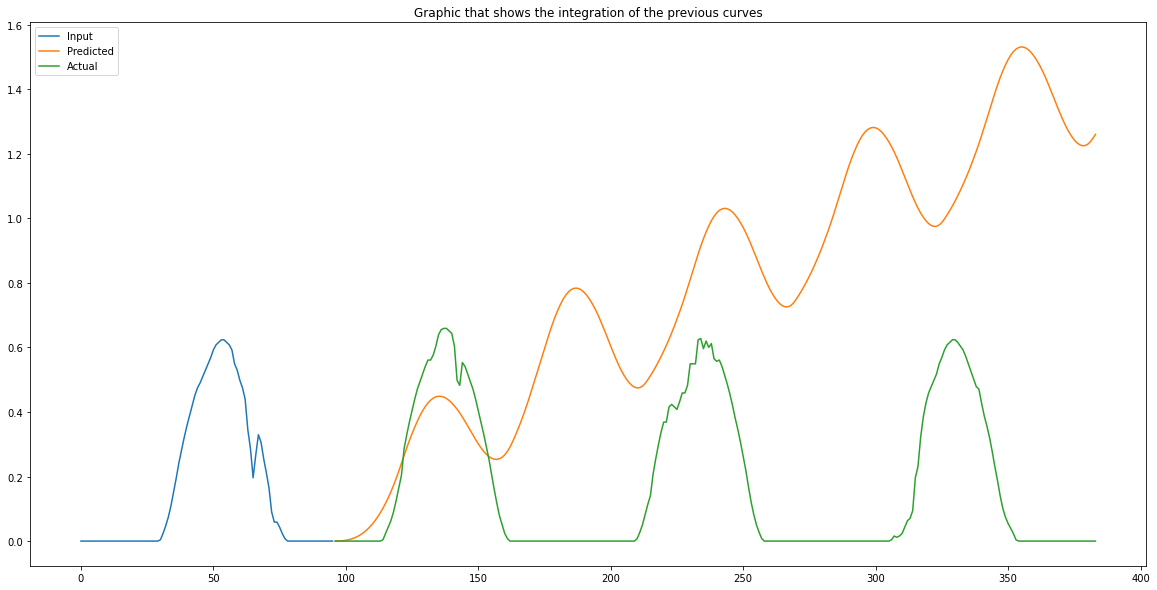

In [74]:
import numpy as np

plt.figure(figsize=(20,10))
input_cumsum = np.cumsum(x_test[0])
actual_cumsum = abs(np.cumsum(y_test[len(x_test[0]): x_final.shape[0]]))
predicted_cumsum =  np.cumsum(x_final[len(x_test[0]):])
plt.plot(first_values, input_cumsum, label="Input")
plt.plot(pred_values, predicted_cumsum, label="Predicted")
plt.plot(pred_values, actual_cumsum, label="Actual")
plt.legend(loc="upper left")
plt.title("Graphic that shows the integration of the previous curves")
plt.show()
